In [1]:
import numpy as np #importing neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

**1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.**

In [2]:
toyoto = pd.read_csv("/content/ToyotaCorolla - MLR.csv") #loading the dataset
toyoto.head(10)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
5,12950,32,61000,Diesel,90,0,2000,3,4,5,1170
6,16900,27,94612,Diesel,90,0,2000,3,4,5,1245
7,18600,30,75889,Diesel,90,0,2000,3,4,5,1245
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105


In [3]:
toyoto.rename(columns={'Age_08_04':'Age'},inplace = True) #rename the age column

In [4]:
toyoto.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [7]:
toyoto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB



**By considering the above data there are more no of interger variables than categorical variables(only one). It contains total of 1436 rows and I did not find any missing rows in the data**

In [10]:
toyoto.shape

(1436, 11)

In [9]:
toyoto.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


Key Insights

From above table, I understand that

Price: The min proce of a car is 4350 dollars and max is 32500. The mean and median of price are 10730, 9900.

Age : The min age of a car is 1 and max age is 80. The mean and medians of age are 56,61.

By considering the above 2 columns mean and median, I conclude that those both are not normally distributed.

KM : The min kilo meters travelled by a car is 1 and max KM is 243000. The average distance travelled by a car is 68533.25 and max cars travelled the distance of 63389 KM.

HP : The min HP of a car is 69 and max HP is 192. Here HP represents the Horse power of a car. For some models of a cars with specific HP. Like mobiles have version. By this we can't do anything with mean and median of the HP.

Automatic : It contains two categories one Yes(1) and No(0).

CC : It is also like HP.

Doors : The cars contains min of 2 doors and max of 5 doors.

Cylinder : By considering the cylinder column there is only one category of 4.

Gears : The min no of gears for a car is 3 and max is 6.

Weight : A car contains min of 1000 kg's and max of 1615 kg's. The avg weight of a cars is 1072 kg's.

In [11]:
toyoto[toyoto['Price']==4350] # find the how many cars with min price of 4350

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
191,4350,44,158320,Diesel,69,0,1800,5,4,5,1110


In [12]:
toyoto[toyoto['Age']==80].sort_values(by='Price',ascending=False) #Find how many cars with max age of 80.


,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1175,9950,80,94079,Petrol,110,0,1600,5,4,5,1085
1307,9950,80,69904,Petrol,110,0,1600,5,4,5,1070
1182,9900,80,92255,Petrol,107,1,1600,5,4,5,1105
1081,9500,80,137178,Diesel,90,0,2000,5,4,5,1135
1323,9450,80,66843,Petrol,110,0,1600,5,4,5,1075
1408,9250,80,44444,Petrol,110,0,1600,3,4,5,1050
1090,9250,80,128351,Petrol,110,0,1600,5,4,5,1070
1176,9250,80,93841,Petrol,110,0,1600,5,4,5,1070
1274,9000,80,74196,Petrol,110,0,1600,5,4,5,1075
1339,9000,80,63266,Petrol,110,0,1600,4,4,5,1035


From the above a car with age has max price of 9950 and min of 6150

In [13]:
toyoto['Cylinders'].value_counts() #finding count of unique values of cylinders column

,count
Cylinders,
4,1436


In [14]:
toyoto.drop(columns=['Cylinders'],inplace=True) #Removing the cylinder column because it cointains only one unique value
toyoto.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


In [15]:
toyoto[toyoto.duplicated()] #Finding duplicate values in the dataset

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,5,1320


In [16]:
toyoto[(toyoto['Price']==24950) & (toyoto['Age']==8)] #Finding which rows are duplicated

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
112,24950,8,13253,Diesel,116,0,2000,5,5,1320
113,24950,8,13253,Diesel,116,0,2000,5,5,1320


In [17]:

toyoto.drop(index=112,inplace=True) #Deleting duplicate column
toyoto.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


In [18]:

toyoto.isna().sum() #finding the null values in the dataset

,0
Price,0
Age,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Gears,0
Weight,0



From above I find that there is no missing or null values in the dataset

In [19]:
fig = px.box(toyoto[toyoto.describe().columns],template='plotly_dark') #Creating the box plot for data for finding the outliers
fig.update_layout(title='Box Plot for Toyoto Dataset')
fig.show()

From above KM column contains the max outliers in the column and next is price

In [20]:

def outliers_detection(df): #Creating the function for detecting the outliers in the dataset
    outliers = pd.DataFrame() #Creating the dataframe to append the outliers
    for i in df.describe().columns:
        q1 = df[i].quantile(0.25) #Finding the first quantile of column
        q3 = df[i].quantile(0.75) #Finding the third quantile of column

        IQR = q3 - q1 #Finding the Interquartile range

        lower_bound = q1 - (1.5 * IQR) #finding the lower bound of column
        upper_bound = q3 + (1.5 * IQR) #finding the upper bound of column

        out = df[(df[i]<lower_bound) | (df[i]>upper_bound)] #Finding the outliers in the dataset
        outliers = pd.concat([outliers,out]) #Append the outliers to dataframe

    return outliers #Return the outliers from the dataset

In [21]:
outliers = outliers_detection(toyoto)
toyoto_outliers = outliers.drop_duplicates().reset_index().drop('index',axis=1) #Create a separate dataframe for outliers by droping duplicates
toyoto_outliers

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,18600,30,75889,Diesel,90,0,2000,3,5,1245
1,21500,27,19700,Petrol,192,0,1800,3,5,1185
2,20950,25,31461,Petrol,192,0,1800,3,6,1185
3,19950,22,43610,Petrol,192,0,1800,3,6,1185
4,19600,25,32189,Petrol,192,0,1800,3,6,1185
...,...,...,...,...,...,...,...,...,...,...
332,10450,65,36000,Petrol,110,0,1600,3,6,1065
333,10950,62,35512,Petrol,110,0,1600,3,6,1065
334,10750,60,31480,Petrol,110,0,1600,3,6,1065
335,12450,44,74172,Petrol,110,0,1600,5,5,1615


In [22]:

data = toyoto[~toyoto.index.isin(outliers.index)] #Creating dataframe by removing the outliers in the dataset
toyoto = data.reset_index().drop('index',axis=True)
toyoto

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,12950,23,71138,Diesel,69,0,1900,3,5,1105
1,16750,24,25563,Petrol,110,0,1600,3,5,1065
2,16950,30,64359,Petrol,110,0,1600,3,5,1105
3,15950,30,67660,Petrol,110,0,1600,3,5,1105
4,15950,28,56349,Petrol,110,0,1600,3,5,1120
...,...,...,...,...,...,...,...,...,...,...
1093,7500,69,20544,Petrol,86,0,1300,3,5,1025
1094,10845,72,19000,Petrol,86,0,1300,3,5,1015
1095,8500,71,17016,Petrol,86,0,1300,3,5,1015
1096,7250,70,16916,Petrol,86,0,1300,3,5,1015


In [23]:
toyoto['Gears'].value_counts() #Finding the unque value counts in the gears colums

,count
Gears,
5,1098


In [24]:
toyoto.drop(columns='Gears',inplace=True) #Removing the gears column because it cointains only one unique value

In [25]:

print(toyoto.shape)
toyoto.head()

(1098, 9)


,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Weight
0,12950,23,71138,Diesel,69,0,1900,3,1105
1,16750,24,25563,Petrol,110,0,1600,3,1065
2,16950,30,64359,Petrol,110,0,1600,3,1105
3,15950,30,67660,Petrol,110,0,1600,3,1105
4,15950,28,56349,Petrol,110,0,1600,3,1120


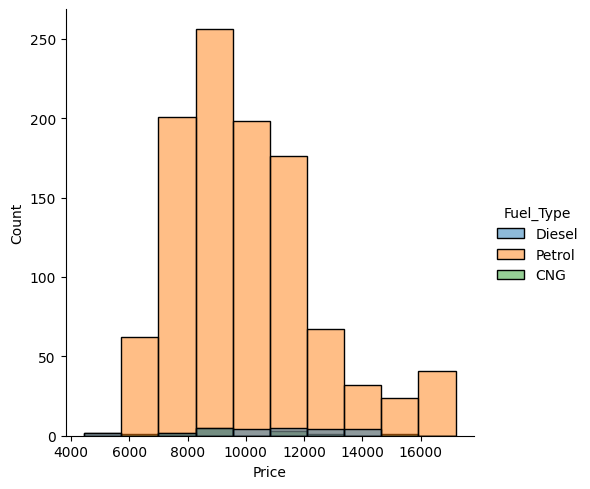

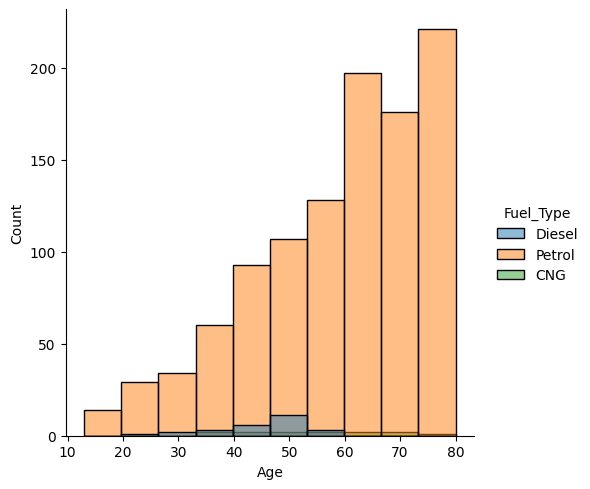

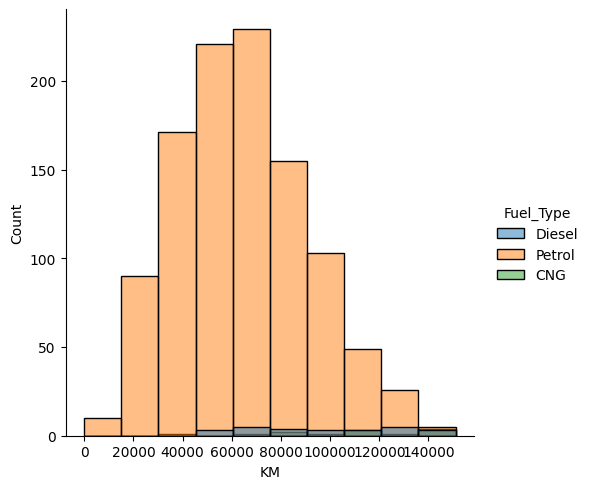

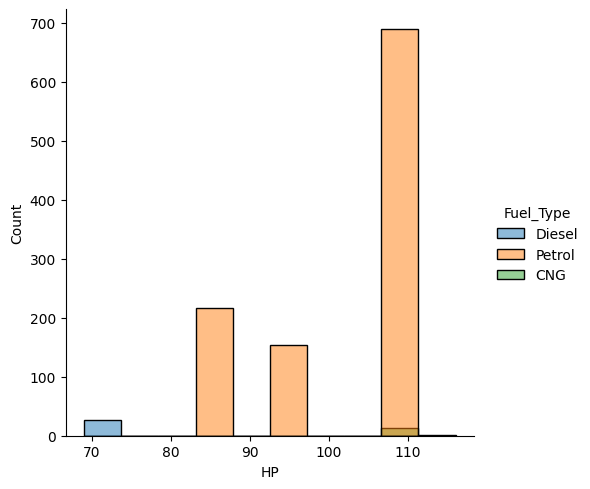

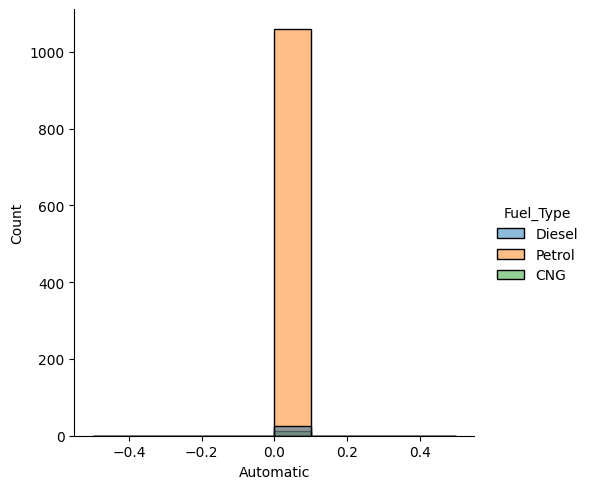

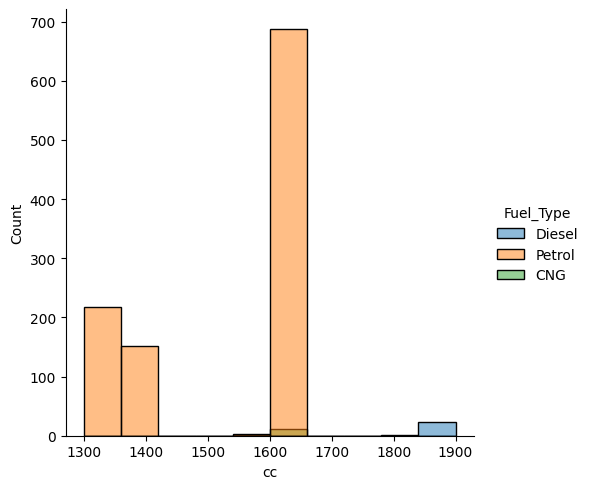

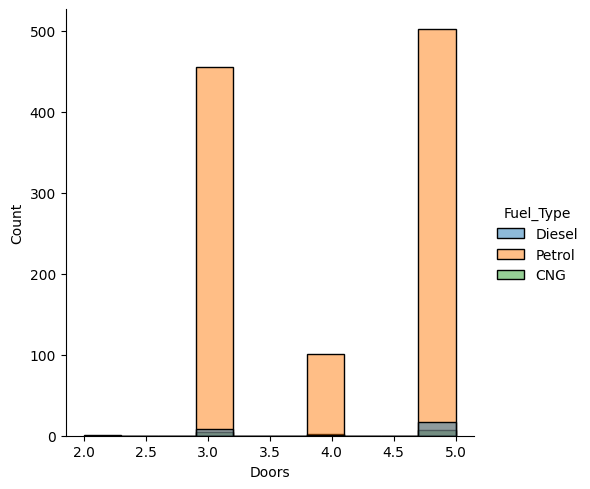

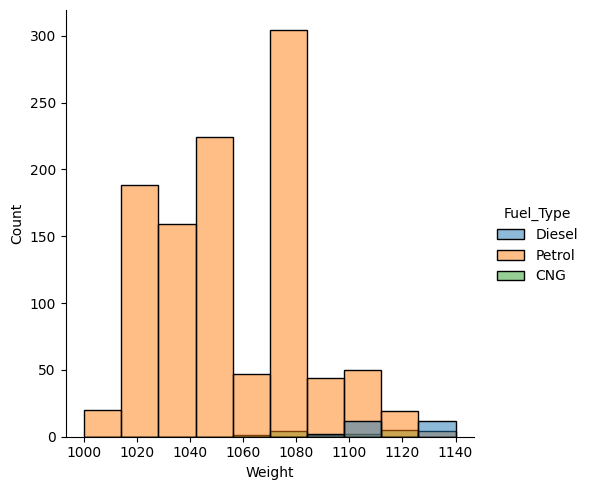

In [26]:
for i in toyoto.describe().columns: #Ploting the histogram for numerical columns
    sns.displot(data=toyoto,x=i,bins=10,hue='Fuel_Type')
    plt.show()


From above histogram plots:

Price and Age columns are skewed and KM coluns is normally distribuated.

Remaing columns contains some distinct categories except Weight column.

Weight column contains some unusual distributions in the column.

In [27]:

toyoto['HP'].value_counts() #Finding the unque value counts in HP column

,count
HP,
110,702
86,216
97,153
69,26
116,1


In [28]:
data = toyoto['Fuel_Type'].value_counts().reset_index() #Finding the unque value counts in fuel type column
data

,Fuel_Type,count
0,Petrol,1059
1,Diesel,26
2,CNG,13


In [29]:
fig = px.bar(data,x='Fuel_Type',y='count',template='plotly_dark',color='Fuel_Type') #Ploting the bar plot for fuel type column
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for Fuel Type',
                 title_x=0.5)
fig.show()

From the above plot

There are 3 different types of categories.

.Petrol

.Diesel

.CNG

Among those 3 categories max cars are belongs to the petrol

In [30]:
columns = toyoto.describe().columns
columns = columns[:4].append(columns[5:])
columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Weight'], dtype='object')

In [31]:
corr = toyoto[columns].corr() #Finding the correlation between numeric column
corr

,Price,Age,KM,HP,cc,Doors,Weight
Price,1.000000,-0.867168,-0.531257,0.111864,0.109523,0.178103,0.472660
Age,-0.867168,1.000000,0.468104,0.011544,-0.066002,-0.102536,-0.388867
KM,-0.531257,0.468104,1.000000,-0.046861,0.142423,0.010608,-0.030156
HP,0.111864,0.011544,-0.046861,1.000000,0.592455,0.170784,0.308100
cc,0.109523,-0.066002,0.142423,0.592455,1.000000,0.218468,0.617273
Doors,0.178103,-0.102536,0.010608,0.170784,0.218468,1.000000,0.535303
Weight,0.472660,-0.388867,-0.030156,0.308100,0.617273,0.535303,1.000000


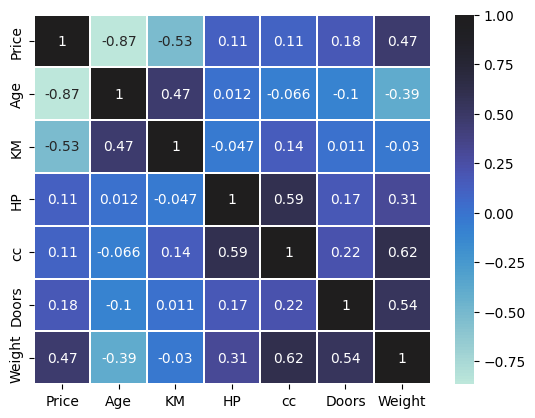

In [32]:
sns.heatmap(data=corr,annot=True,center=True,linecolor='white',linewidths=1.2) #Ploting the correlation matrix using seaborn heatmap
plt.show()


From the above correlation plot

Price and Age are Hightly negatively correlated, It means when the Age of a car is increased then price of a cars is decreased. Vice Versa.

Price and KM, Weight are moderatley correlated with each other.

In [36]:
fig = px.scatter(toyoto,x='Age',y='Price',color='Price') #Finding the correlation between price and age using scatter plot
fig.update_layout(title='Scatter Plot for Age and Price')
fig.show()

In [35]:
fig = px.scatter(toyoto,y='Weight',x='KM',color='Weight') #Finding the coreelation between weight and km
fig.show()

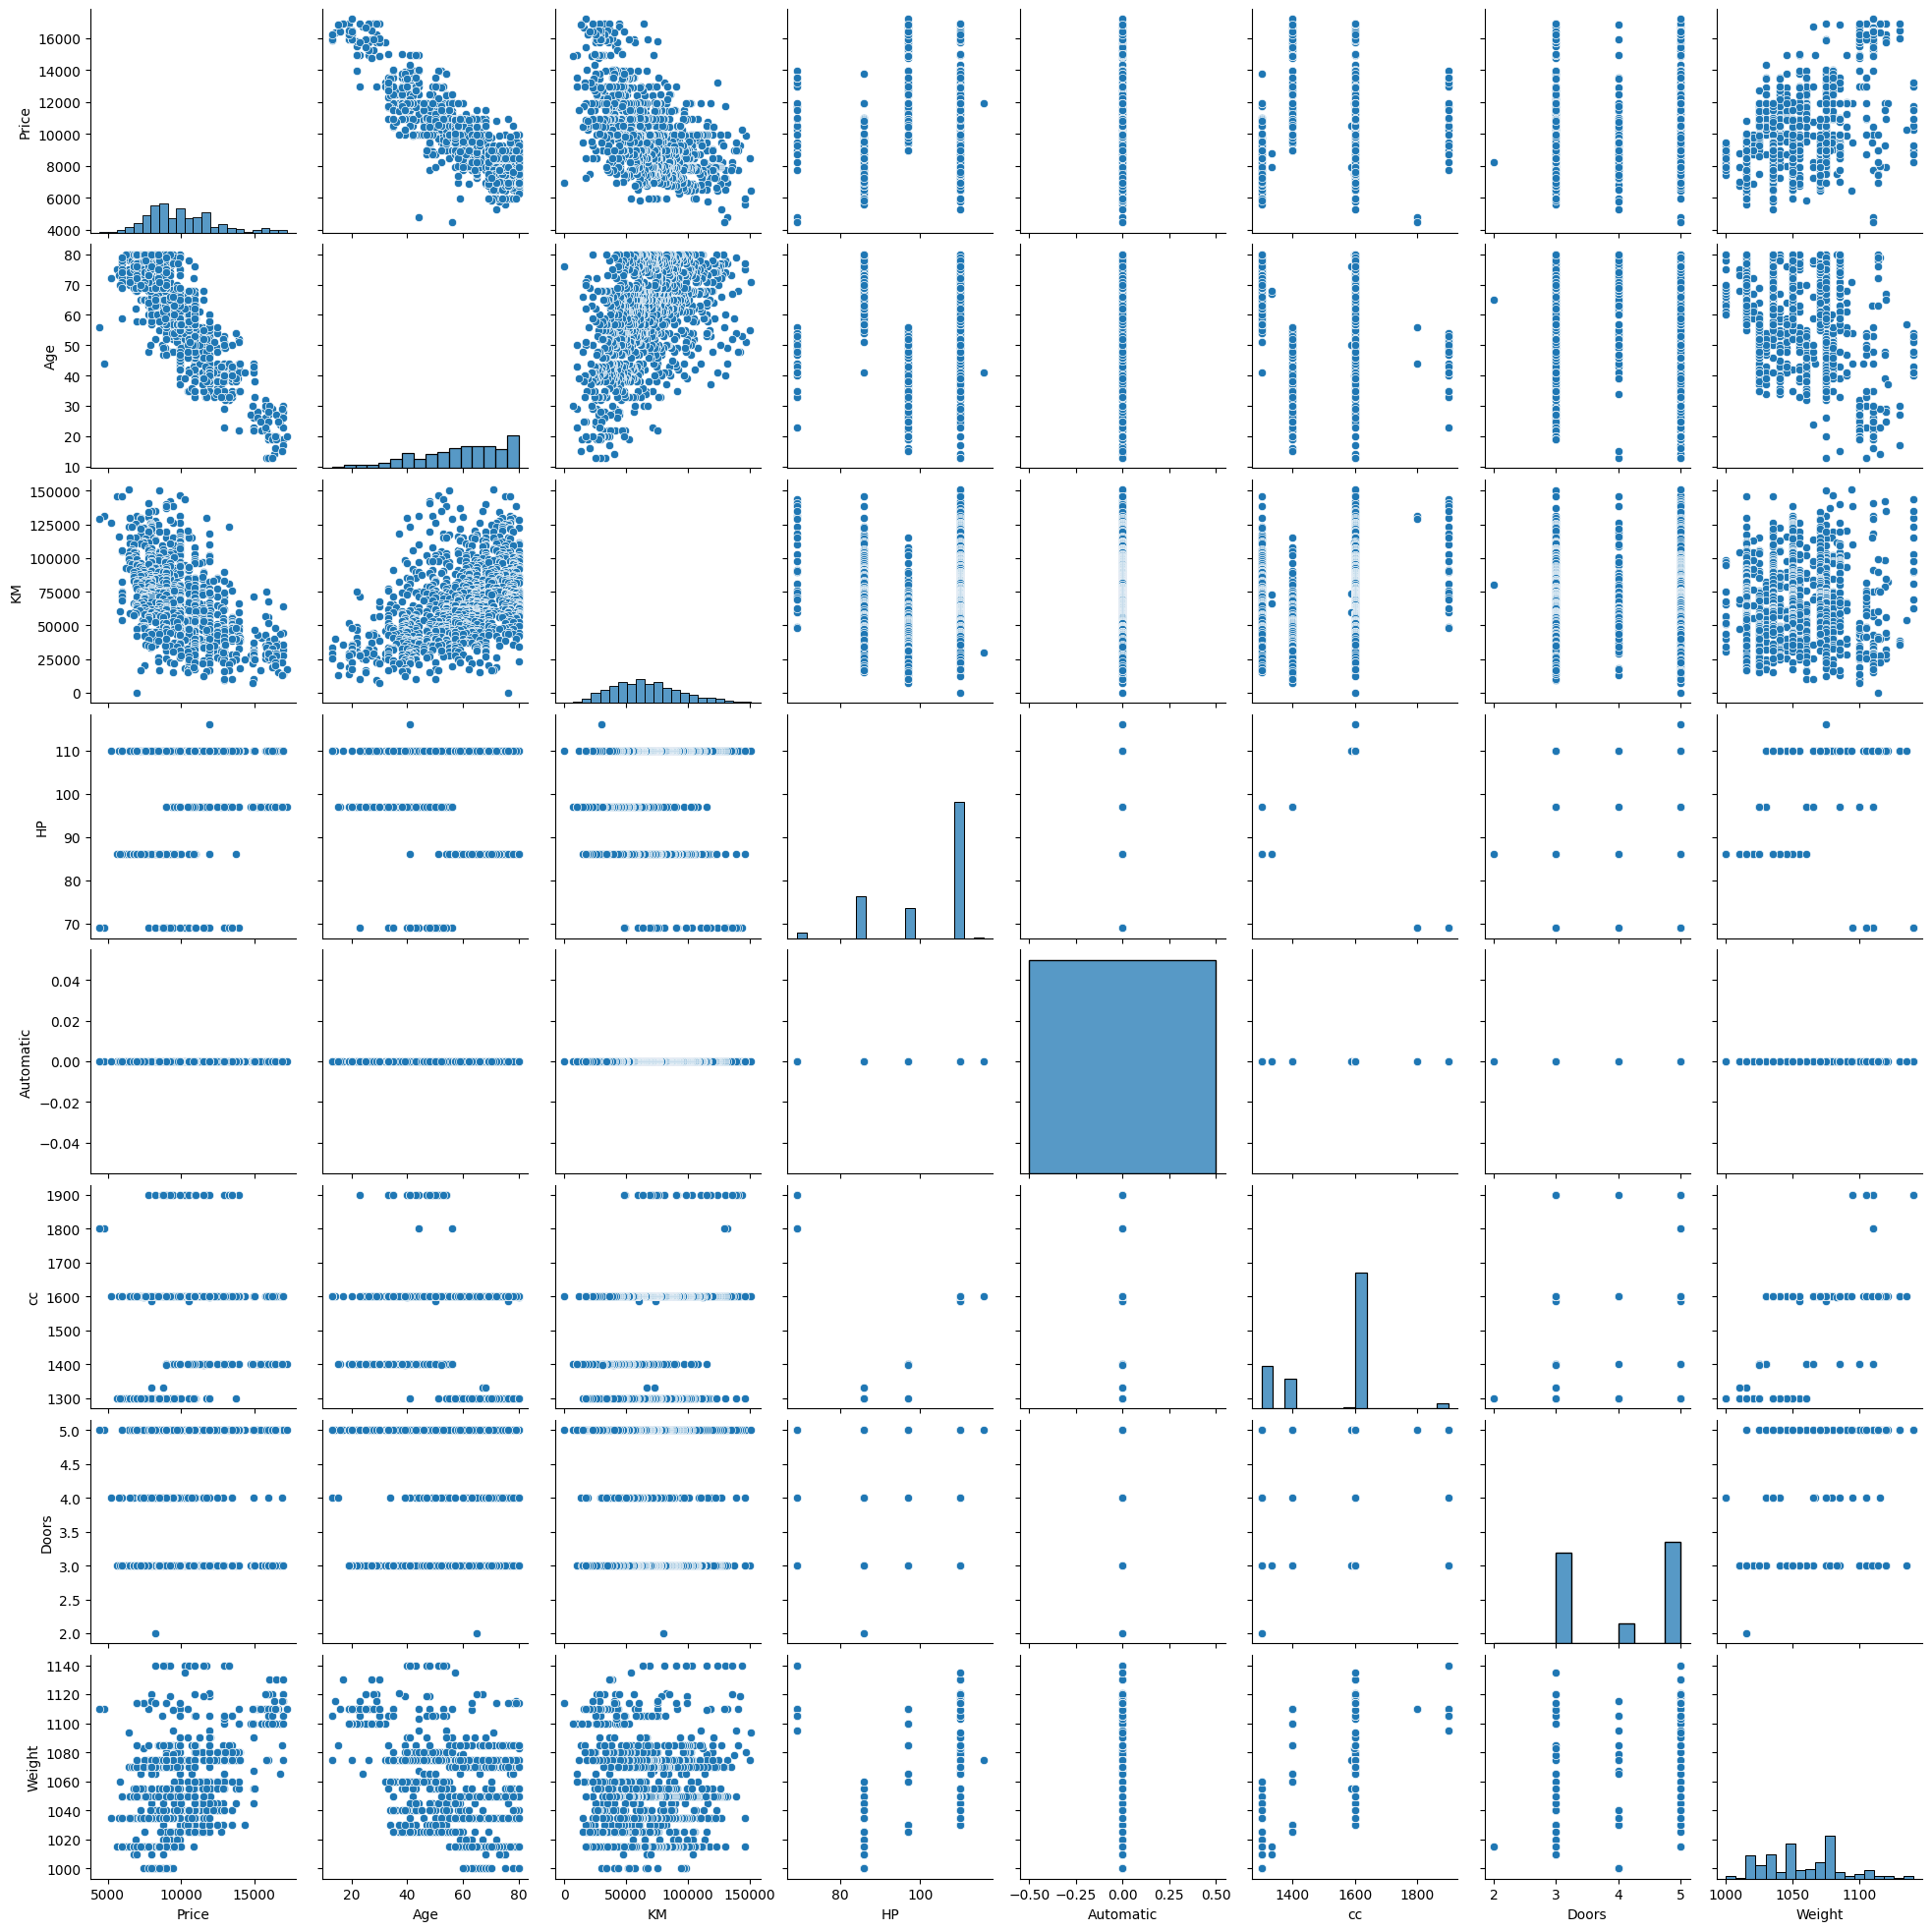

In [37]:
sns.pairplot(toyoto[toyoto.describe().columns]) #Ploting the pair plot for finding the correlation between each column in the dataset
plt.show()

In [38]:

toyoto.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Weight
0,12950,23,71138,Diesel,69,0,1900,3,1105
1,16750,24,25563,Petrol,110,0,1600,3,1065
2,16950,30,64359,Petrol,110,0,1600,3,1105
3,15950,30,67660,Petrol,110,0,1600,3,1105
4,15950,28,56349,Petrol,110,0,1600,3,1120


In [39]:
toyoto['Automatic'].value_counts()


,count
Automatic,
0,1098


In [40]:
toyoto.drop('Automatic',axis=1,inplace=True)
toyoto.head()

,Price,Age,KM,Fuel_Type,HP,cc,Doors,Weight
0,12950,23,71138,Diesel,69,1900,3,1105
1,16750,24,25563,Petrol,110,1600,3,1065
2,16950,30,64359,Petrol,110,1600,3,1105
3,15950,30,67660,Petrol,110,1600,3,1105
4,15950,28,56349,Petrol,110,1600,3,1120


In [41]:

Fuel = pd.get_dummies(toyoto['Fuel_Type'],drop_first=True).astype(int) #Creating the dummy values for categorical variables by droping the first column
Fuel.head()

,Diesel,Petrol
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [42]:
toyoto = pd.concat([toyoto,Fuel],axis=1) #Add the dummy values to dataset
toyoto

,Price,Age,KM,Fuel_Type,HP,cc,Doors,Weight,Diesel,Petrol
0,12950,23,71138,Diesel,69,1900,3,1105,1,0
1,16750,24,25563,Petrol,110,1600,3,1065,0,1
2,16950,30,64359,Petrol,110,1600,3,1105,0,1
3,15950,30,67660,Petrol,110,1600,3,1105,0,1
4,15950,28,56349,Petrol,110,1600,3,1120,0,1
...,...,...,...,...,...,...,...,...,...,...
1093,7500,69,20544,Petrol,86,1300,3,1025,0,1
1094,10845,72,19000,Petrol,86,1300,3,1015,0,1
1095,8500,71,17016,Petrol,86,1300,3,1015,0,1
1096,7250,70,16916,Petrol,86,1300,3,1015,0,1


In [43]:
toyoto.drop('Fuel_Type',axis=1,inplace=True) #Removing the fuel type column because we have dummy values instead of that
toyoto.head()

,Price,Age,KM,HP,cc,Doors,Weight,Diesel,Petrol
0,12950,23,71138,69,1900,3,1105,1,0
1,16750,24,25563,110,1600,3,1065,0,1
2,16950,30,64359,110,1600,3,1105,0,1
3,15950,30,67660,110,1600,3,1105,0,1
4,15950,28,56349,110,1600,3,1120,0,1


**2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).**

In [44]:
from sklearn.linear_model import LinearRegression #Importing the regression model
from sklearn.model_selection import train_test_split #importing the train test split module from scikit learn
Y1 = toyoto['Price'] #separating the dependent and independent variables
Y2 = toyoto['Price']
Y3 = toyoto['Price']
x1 = toyoto.drop(columns=['Price','Weight','Age'])
x2 = toyoto.drop(columns=['Price','KM','Age'])
x3 = toyoto.drop(columns=['Price','KM','Weight'])

In [45]:
X1_train,X1_test,y1_train,y1_test = train_test_split(x1,Y1,random_state=42,test_size=0.2) #Separating the dependent and independent variables as train,test data
X2_train,X2_test,y2_train,y2_test = train_test_split(x2,Y2,random_state=42,test_size=0.2)
X3_train,X3_test,y3_train,y3_test = train_test_split(x3,Y3,random_state=42,test_size=0.2)
print("Train Data :",X1_train.shape,y1_train.shape) #Finding the shape of train and test data
print("Test Data :",X1_test.shape,y1_test.shape)

Train Data : (878, 6) (878,)
Test Data : (220, 6) (220,)


**3.Build a multiple linear regression model using the training dataset.**

In [46]:
model1 = LinearRegression() #Accessing the linear regression model
model2 = LinearRegression()
model3 = LinearRegression()
model1.fit(X1_train,y1_train) #Training the models
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)

LinearRegression()


**Interpret the coefficients of the model.**

In [47]:
print(f"Intercept: {model1.intercept_}") #Finding the intercepts of model

Intercept: 17835.33775437887


In [48]:
for i,j in enumerate(x1.columns):
    print(f"The coefficient for {j} is {model1.coef_[i]}")

The coefficient for KM is -0.04228334984889847
The coefficient for HP is 587.5626574180052
The coefficient for cc is -43.17662554078447
The coefficient for Doors is 339.206170767488
The coefficient for Diesel is 36532.12281323361
The coefficient for Petrol is -1914.468598417242


Interpreting the Beta Coefficients For Model1

With a unit increase in KM, we shall see 0.042283 unit decrease in the Price

With a unit increase in HP, we shall see 587.562657 unit increase in the Price

With a unit increase in cc, we shall see 43.1766255 unit decrease in the Price

With a unit increase in Doors, we shall see 339.206170 unit increase in the Price

With a unit increase in Diesel, we shall see 36532.122813 unit increase in the Price

With a unit increase in Petrol, we shall see 1914.468598 unit decrease in the Price

In [49]:
print(f"Intercept: {model2.intercept_}") #Finding the intercepts of model

Intercept: -32369.95561960523


In [50]:
for i,j in enumerate(x2.columns): #Finding the coefficients of each column
    print(f"The coefficient for {j} is {model2.coef_[i]}")

The coefficient for HP is 559.5504705072447
The coefficient for cc is -46.729707440496625
The coefficient for Doors is -299.36234572554434
The coefficient for Weight is 52.05363603754626
The coefficient for Diesel is 35743.11356904007
The coefficient for Petrol is 1491.0771503804585



Interpreting the Beta Coefficients For Model2

With a unit increase in Weight, we shall see 52.053636 unit increase in the Price

With a unit increase in HP, we shall see 559.550470 unit increase in the Price

With a unit increase in cc, we shall see 46.729707 unit decrease in the Price

With a unit increase in Doors, we shall see 299.362345 unit decrease in the Price

With a unit increase in Diesel, we shall see 35743.113569 unit increase in the Price

With a unit increase in Petrol, we shall see 1491.077150 unit increase in the Price

In [51]:
print(f"Intercept: {model3.intercept_}") #Finding the intercepts of model

Intercept: 13487.344396515924


In [52]:
for i,j in enumerate(x3.columns): #Finding the coefficients of each column
    print(f"The coefficient for {j} is {model3.coef_[i]}")

The coefficient for Age is -132.61299448075937
The coefficient for HP is -56.79696517392452
The coefficient for cc is 5.9415899160246965
The coefficient for Doors is 162.30984501012955
The coefficient for Diesel is -4874.270402020341
The coefficient for Petrol is 606.7594185040643


Interpreting the Beta Coefficients For Model1

With a unit increase in Age, we shall see 132.612994 unit decrease in the Price

With a unit increase in HP, we shall see 56.796965 unit decrease in the Price

With a unit increase in cc, we shall see 5.941589 unit increase in the Price

With a unit increase in Doors, we shall see 162.309845 unit increase in the Price

With a unit increase in Diesel, we shall see 4874.270402 unit decrease in the Price

With a unit increase in Petrol, we shall see 606.759418 unit increase in the Price

In [53]:
Y1_pred = model1.predict(X1_test) #Predict the datapoints using the trained model with the help of test data
Y2_pred = model2.predict(X2_test)
Y3_pred = model3.predict(X3_test)

Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

Performance Metrics for Model1

In [54]:
def adj_r2(a,b,c): #Creating a function for calculate adj r2 value of models
    r2 = metrics.r2_score(a,b) #To find the r squared value of model
    n = 878 #length of sample size taken from shape of x_train
    p = len(c.coef_) #Find the no of coefficient values
    return 1-(1-r2)*(n-1)/(n-p-1) #Return adjusted r squared value
from sklearn import metrics #Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset for model1
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, Y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, Y1_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y1_test, Y1_pred, squared=False))
print('R_Squared Error :',metrics.r2_score(y1_test, Y1_pred))
print('Adj R_Squared Error :',adj_r2(y1_test, Y1_pred,model1))

Mean Absolute Error: 1431.6235603438515
Mean Squared Error: 3587213.4988875357
Root Mean Squared Error: 1893.9940598870778
R_Squared Error : 0.38681385098526155
Adj R_Squared Error : 0.3825898361814861


Performance Metrics for Model2

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, Y2_pred)) #Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset for model1
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, Y2_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y2_test, Y2_pred, squared=False))
print('R_Squared Error :',metrics.r2_score(y2_test, Y2_pred))
print('Adj R_Squared Error :',adj_r2(y2_test, Y2_pred,model2))

Mean Absolute Error: 1468.6729275114333
Mean Squared Error: 3644073.650470857
Root Mean Squared Error: 1908.945690812302
R_Squared Error : 0.37709436888792236
Adj R_Squared Error : 0.37280340013169677


Performance Metrics for Model3

In [56]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y3_test, Y3_pred)) #Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset for model1
print('Mean Squared Error:', metrics.mean_squared_error(y3_test, Y3_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y3_test, Y3_pred, squared=False))
print('R_Squared Error :',metrics.r2_score(y3_test, Y3_pred))
print('Adj R_Squared Error :',adj_r2(y3_test, Y3_pred,model3))

Mean Absolute Error: 889.5476444699682
Mean Squared Error: 1230183.4627745685
Root Mean Squared Error: 1109.136358963391
R_Squared Error : 0.7897165974776004
Adj R_Squared Error : 0.7882680321330144



Apply Lasso and Ridge methods on the model.

Ridge for Model1

In [57]:

from sklearn.linear_model import Ridge #Applying the redge regression to the train and test data
ridgereg1 = Ridge(alpha=0.01)
ridgereg1.fit(X1_train,y1_train)
y_pred = ridgereg1.predict(X1_test)
print('R_Squared Error :',metrics.r2_score(y1_test, y_pred))
print('Adj R_Squared Error :',adj_r2(y1_test, y_pred,ridgereg1))

R_Squared Error : 0.38886433642155305
Adj R_Squared Error : 0.3846544466609667


Ridge for Model2

In [58]:
ridgereg2 = Ridge(alpha=0.01)
ridgereg2.fit(X2_train,y2_train)
y_pred = ridgereg2.predict(X2_test)
print('R_Squared Error :',metrics.r2_score(y2_test, y_pred))
print('Adj R_Squared Error :',adj_r2(y2_test, y_pred,ridgereg2))

R_Squared Error : 0.37988413272360844
Adj R_Squared Error : 0.375612381628708



Ridge for Model3

In [59]:
ridgereg3 = Ridge(alpha=0.01)
ridgereg3.fit(X3_train,y3_train)
y_pred = ridgereg3.predict(X3_test)
print('R_Squared Error :',metrics.r2_score(y3_test, y_pred))
print('Adj R_Squared Error :',adj_r2(y3_test, y_pred,ridgereg3))

R_Squared Error : 0.7894809567429335
Adj R_Squared Error : 0.7880307681556288



Lasso for Model1

In [60]:
from sklearn.linear_model import Lasso #Applying the lasso regression to the train and test data
lassoreg1 = Lasso(alpha=0.01)
lassoreg1.fit(X1_train,y1_train)
y_pred = lassoreg1.predict(X1_test)
print('R_Squared Error :',metrics.r2_score(y1_test, y_pred))
print('Adj R_Squared Error :',adj_r2(y1_test, y_pred,lassoreg1))

R_Squared Error : 0.38692496092477213
Adj R_Squared Error : 0.3827017115166764



Lasso for Model2

In [61]:
lassoreg2 = Lasso(alpha=0.01)
lassoreg2.fit(X2_train,y2_train)
y_pred = lassoreg2.predict(X2_test)
print('R_Squared Error :',metrics.r2_score(y2_test, y_pred))
print('Adj R_Squared Error :',adj_r2(y2_test, y_pred,lassoreg2))

R_Squared Error : 0.3772581231774299
Adj R_Squared Error : 0.3729682824645304


Lasso for Model3

In [62]:
lassoreg3 = Lasso(alpha=0.01)
lassoreg3.fit(X3_train,y3_train)
y_pred = lassoreg3.predict(X3_test)
print('R_Squared Error :',metrics.r2_score(y3_test, y_pred))
print('Adj R_Squared Error :',adj_r2(y3_test,y_pred,lassoreg3))

R_Squared Error : 0.7896542142069655
Adj R_Squared Error : 0.7882052191268757


***Conclusion***

From above when compared to other models model gives high accuracy.
So, when compared to other columns Age column gives the High accuracy


**Interview Questions:**

**1.What is Normalization & Standardization and how is it helpful?**

Normalization is a preprocessing technique which is used to put the values in the range of 0 and 1

Standardization is also a preprocessing technique is used to put the values within the 3rd standard deviation. It uses z-score for this.

Uses :

Reduce the dominance of features due to different scales.

Avoid biases in features to improve model performance.

In light of this, improve the interpretability of data by scaling values to a common metric.

This would allow features to be better compared.

Implement these correct while working with the machine learning model.

**2.What techniques can be used to address multicollinearity in multiple linear regression?**

To remove the multi-collinearity in dataset, We can remove the columns which causes multi-collinearity.

Else we can also use dimentionality reduction techniwue like PCA.